# Dependencies

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# De-serializing data

In [3]:
electric = pickle.load(open('serialized files/electric.pkl', 'rb'))
electric

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
6,1183,8.0,276700,134,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
12,1189,8.0,200150,108,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...,...,...,...,...,...
2609,2348,8.0,165300,77,70,1130.0,18.0,Jos Electric,Prepaid,Electricity
2629,2421,8.0,8000,4,31,1130.0,18.0,Jos Electric,Prepaid,Electricity
2631,49,8.0,1600,8,325,0.0,0.0,Ikeja Electric,Prepaid,Electricity
2632,49,8.0,200,1,329,0.0,0.0,Ikeja Electric,Postpaid,Electricity


# Preprocessing

In [8]:
electric = electric[['user_id', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans']]
electric

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
0,1191,532700,137,30
2,1168,548300,114,30
4,1168,211700,75,30
6,1183,276700,134,30
12,1189,200150,108,30
...,...,...,...,...
2609,2348,165300,77,70
2629,2421,8000,4,31
2631,49,1600,8,325
2632,49,200,1,329


In [9]:
electric.describe()

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
count,99.000000,9.900000e+01,99.000000,99.000000
mean,807.343434,1.790094e+05,26.646465,163.868687
std,689.323140,1.005267e+06,42.061013,116.552138
min,18.000000,5.000000e+00,1.000000,30.000000
25%,417.000000,3.212500e+03,2.000000,37.000000
50%,553.000000,2.700000e+04,7.000000,155.000000
75%,1175.500000,9.268650e+04,28.000000,281.500000
max,2669.000000,9.988000e+06,171.000000,329.000000


In [31]:
elec_customers = electric.groupby(['user_id']).agg({
    'TotalTransactionAmount': 'sum',
    'Tx_Count': 'count',
    'DaysSinceLastTrans' : 'sum'
})

elec_customers.rename(columns={'TotalTransactionAmount': 'Amount',
                                 'Tx_Count': 'Freq',
                                'DaysSinceLastTrans': 'Re'}, inplace=True)
elec_customers

,Amount,Freq,Re
user_id,,,
18,8400,2,536
49,10800,3,983
56,103640,4,1182
86,1227033,10,1577
172,95600,4,694
183,155000,1,175
417,913000,2,620
419,263500,2,636
422,9998000,2,500


In [32]:
print(elec_customers.Re.skew())
print(elec_customers.Freq.skew())
print(elec_customers.Amount.skew())

1.9729877803273275
3.920105632613466
7.257254253804292


## Converting Data to Gaussian Distribution

### Visualization

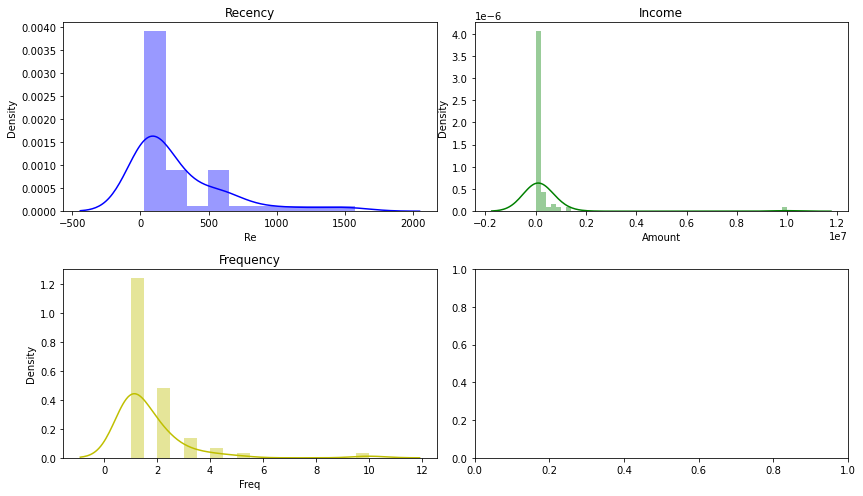

In [33]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(elec_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(elec_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(elec_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation

### BoxCox Transfromation

In [34]:
elec_customers['Amount'] = stats.boxcox(elec_customers['Amount'])[0]
elec_customers['Freq'] = stats.boxcox(elec_customers['Freq'])[0]
elec_customers['Re'] = stats.boxcox(elec_customers['Re'])[0]
elec_customers

,Amount,Freq,Re
user_id,,,
18,10.533209,0.401958,3.764011
49,10.873585,0.488565,3.949527
56,14.067182,0.521769,4.002024
86,17.842062,0.562376,4.080713
172,13.948979,0.521769,3.845515
183,14.661104,0.000000,3.363637
417,17.374100,0.401958,3.810408
419,15.456280,0.401958,3.818404
422,21.297742,0.401958,3.741422


#### Visualization

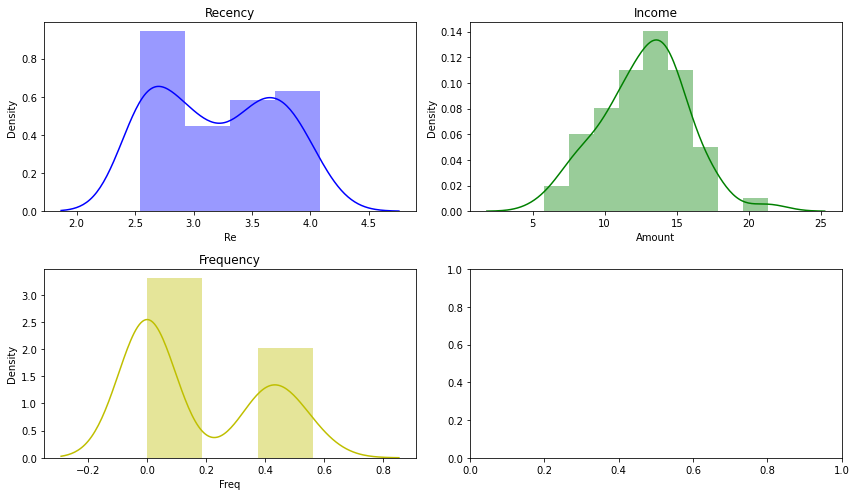

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(elec_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(elec_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(elec_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Normalization

In [15]:
scale = StandardScaler()
scale.fit(elec_customers)
electric_normalized = scale.transform(elec_customers)

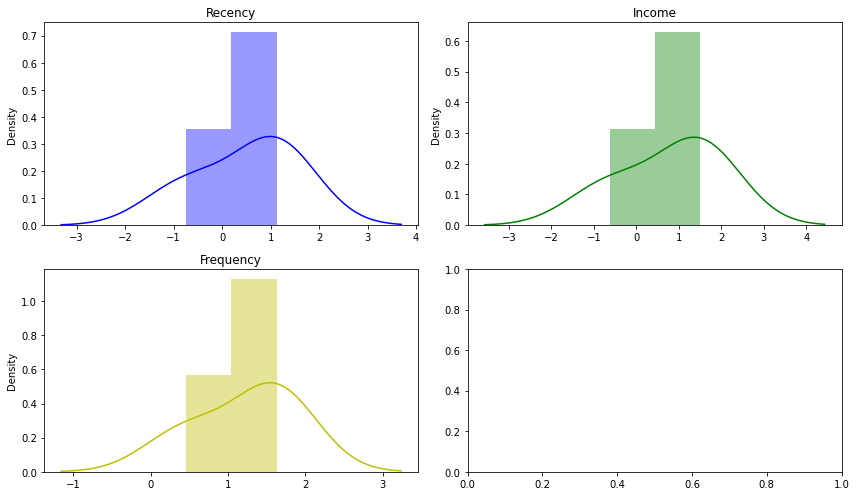

[-0. -0.  0.]
[1. 1. 1.]


In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(electric_normalized[0], color='b', ax=ax[0, 0])
fig = sns.distplot(electric_normalized[1], color='g', ax=ax[0, 1])
fig = sns.distplot(electric_normalized[2], color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

print(electric_normalized.mean(axis = 0).round(2))
print(electric_normalized.std(axis = 0).round(2))

## Clustering

### Hyperparameter Tuning using the Elbow Method

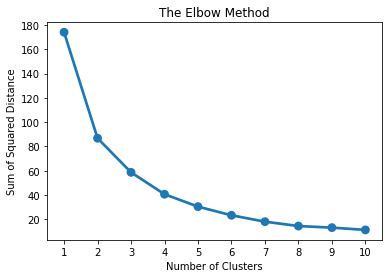

In [18]:
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(electric_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [23]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(electric_normalized)
model.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Matching labels with each customer

In [24]:
elec_customers["Cluster"] = model.labels_
elec_customers.groupby('Cluster').agg({
    'Re':'mean',
    'Freq':'mean',
    'Amount':['mean', 'count']}).round(2)

df_normalized = pd.DataFrame(electric_normalized, columns=['Re', 'Freq', 'Amount'])
df_normalized['Cust ID'] = elec_customers.index
df_normalized['Cluster'] = model.labels_
df_normalized

,Re,Freq,Amount,Cust ID,Cluster
0,-0.747796,1.078583,1.121264,18,2
1,-0.632139,1.477320,1.488906,49,2
2,0.453021,1.630192,1.592941,56,2
3,1.735696,1.817142,1.748881,86,2
4,0.412856,1.630192,1.282783,172,2
5,0.654831,-0.772021,0.327828,183,0
6,1.576686,1.078583,1.213210,417,2
7,0.925026,1.078583,1.229055,419,2
8,2.909910,1.078583,1.076498,422,2
9,0.144596,1.705785,1.690061,424,2


### Melting the Dataframe

In [25]:
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Cust ID', 'Cluster'],
                      value_vars=['Re','Freq','Amount'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,Cust ID,Cluster,Attribute,Value
0,18,2,Re,-0.747796
1,49,2,Re,-0.632139
2,56,2,Re,0.453021
3,86,2,Re,1.735696
4,172,2,Re,0.412856
...,...,...,...,...
169,2419,0,Amount,-1.047661
170,2421,0,Amount,-1.261264
171,2499,0,Amount,-0.995070
172,2632,0,Amount,-1.296402


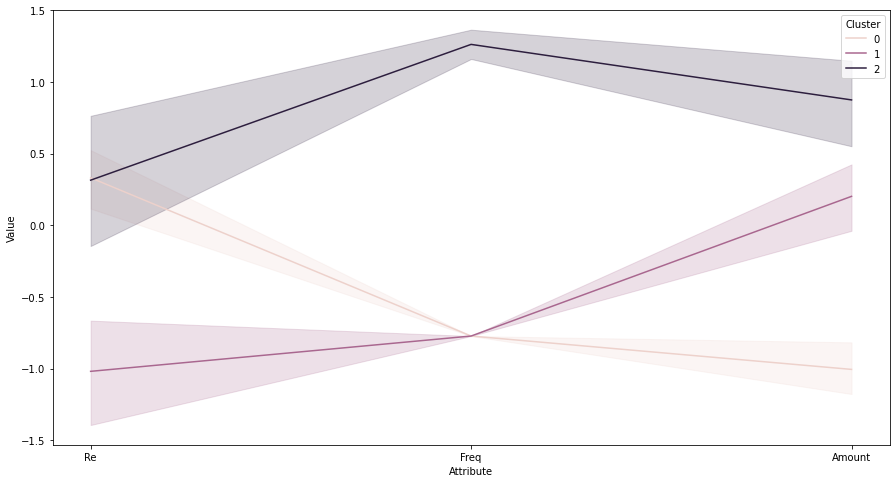

In [29]:
plt.figure(figsize=(15, 8))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()